In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('Telecom_customer churn.csv')
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [4]:
df1 = df.drop(['Customer_ID'],axis=1)
df1.shape

(100000, 99)

In [5]:
df1.isnull().values.any()

True

In [6]:
df1.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid6_10        1732
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Length: 99, dtype: int64

In [7]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 21 categorical variables

The categorical variables : ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [8]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 78 numerical variables

The numerical variables : ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',

array([[<AxesSubplot: title={'center': 'rev_Mean'}>,
        <AxesSubplot: title={'center': 'mou_Mean'}>,
        <AxesSubplot: title={'center': 'totmrc_Mean'}>,
        <AxesSubplot: title={'center': 'da_Mean'}>,
        <AxesSubplot: title={'center': 'ovrmou_Mean'}>,
        <AxesSubplot: title={'center': 'ovrrev_Mean'}>,
        <AxesSubplot: title={'center': 'vceovr_Mean'}>,
        <AxesSubplot: title={'center': 'datovr_Mean'}>,
        <AxesSubplot: title={'center': 'roam_Mean'}>],
       [<AxesSubplot: title={'center': 'change_mou'}>,
        <AxesSubplot: title={'center': 'change_rev'}>,
        <AxesSubplot: title={'center': 'drop_vce_Mean'}>,
        <AxesSubplot: title={'center': 'drop_dat_Mean'}>,
        <AxesSubplot: title={'center': 'blck_vce_Mean'}>,
        <AxesSubplot: title={'center': 'blck_dat_Mean'}>,
        <AxesSubplot: title={'center': 'unan_vce_Mean'}>,
        <AxesSubplot: title={'center': 'unan_dat_Mean'}>,
        <AxesSubplot: title={'center': 'plcd_vce_

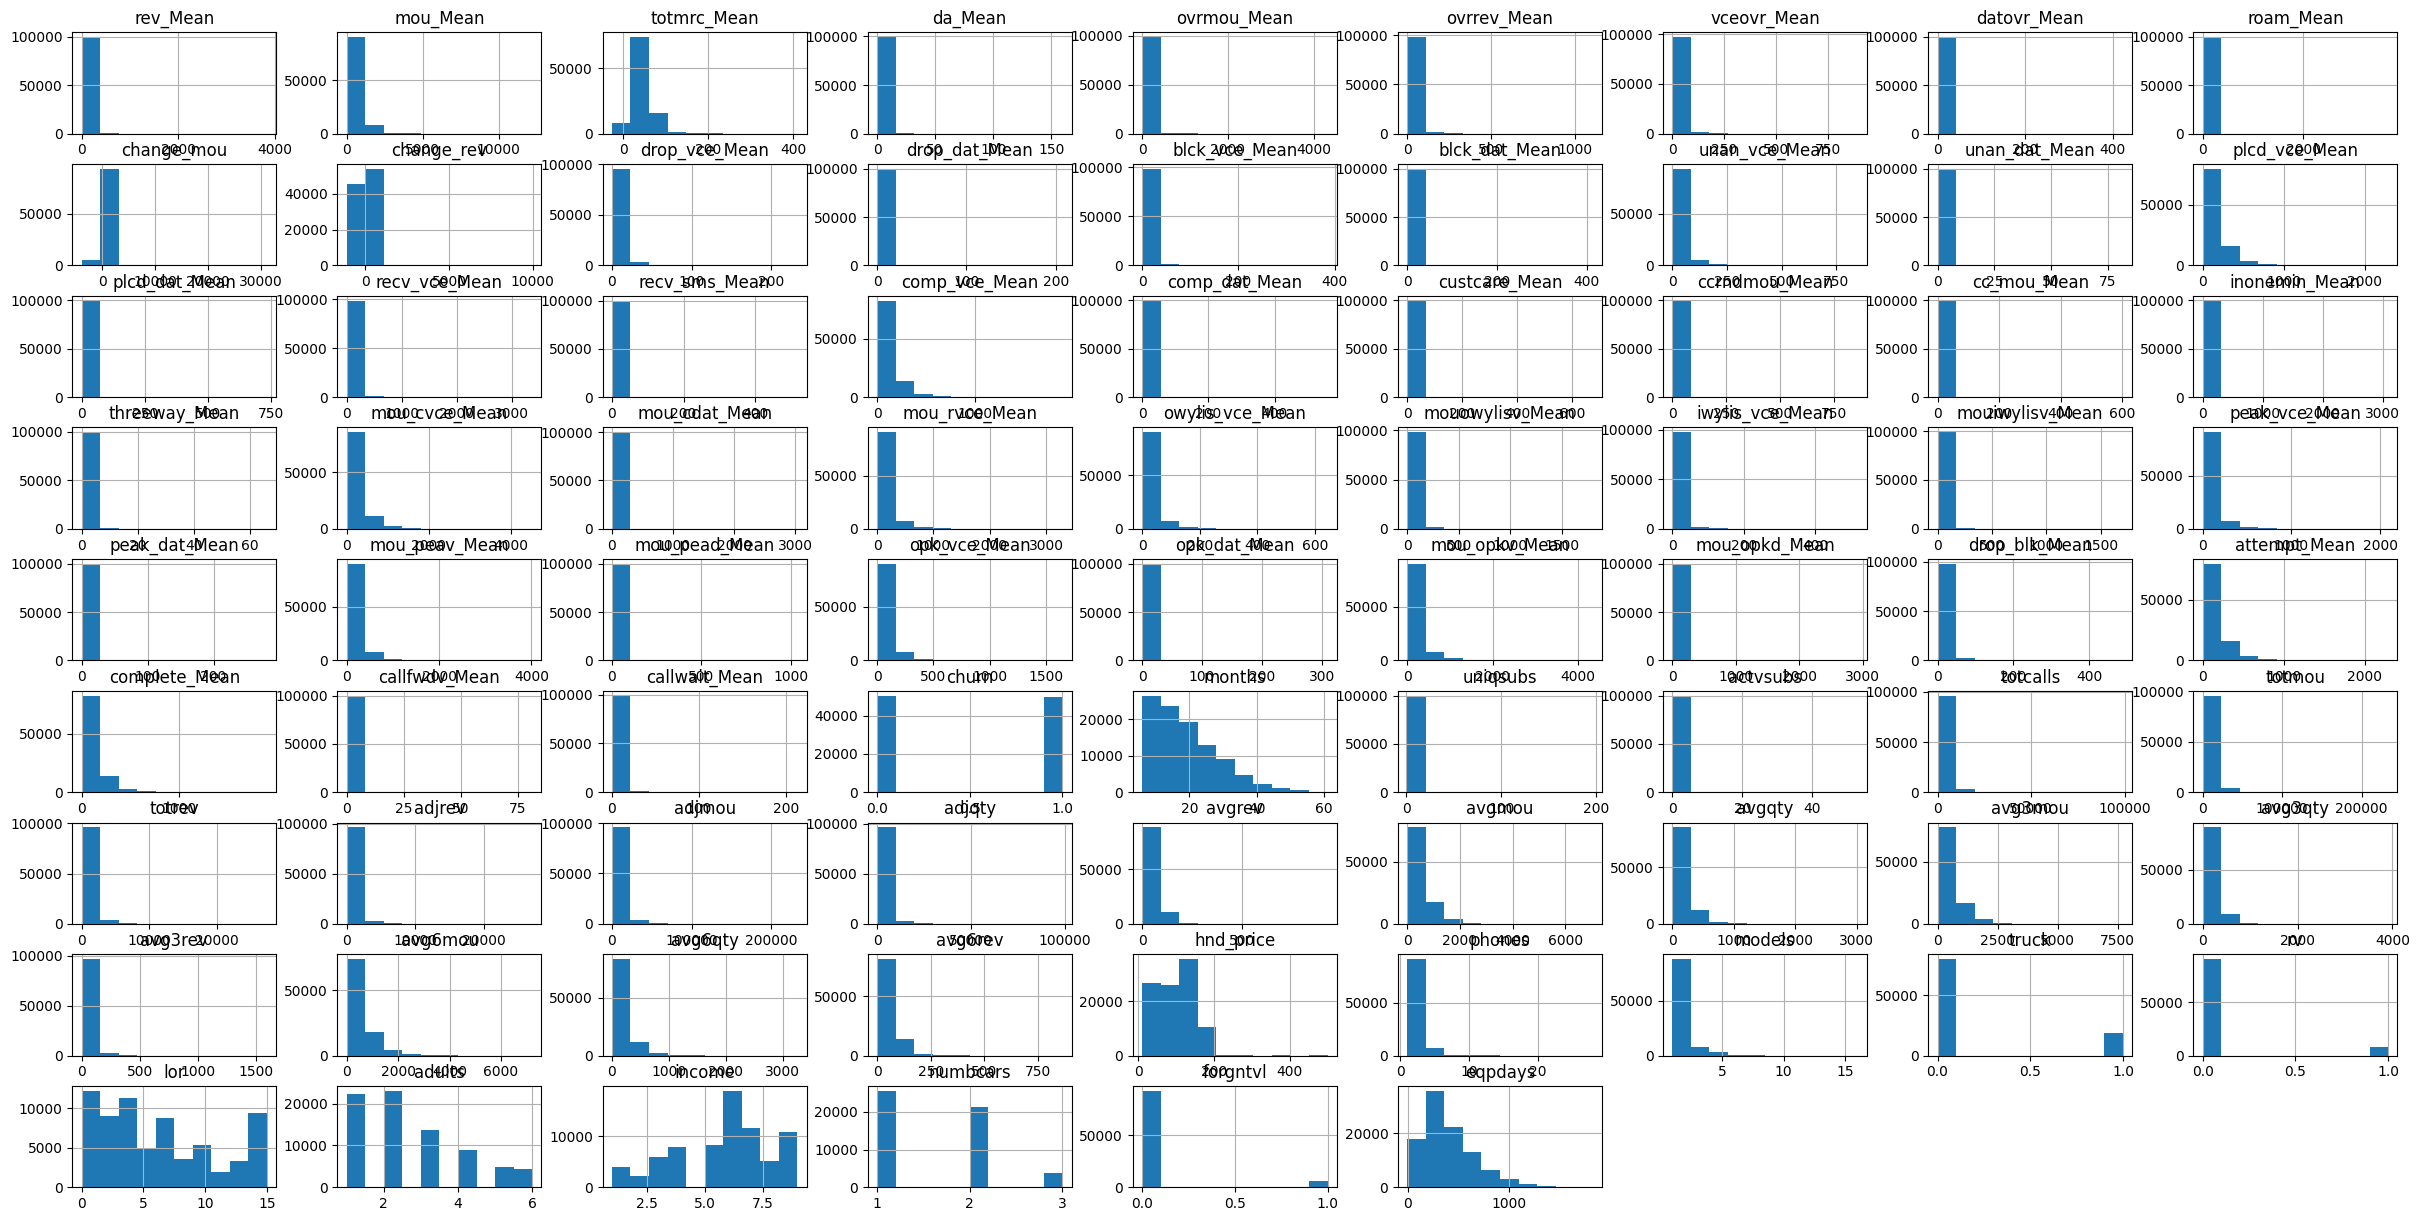

In [9]:
df1[numerical].hist(figsize=(30,15))

In [10]:
df1[numerical]=df1[numerical].fillna(df1[numerical].mean())

In [11]:
df1[numerical].isnull().values.any()

False

In [12]:
df1[numerical].isnull().sum()

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
adults         0
income         0
numbcars       0
forgntvl       0
eqpdays        0
Length: 78, dtype: int64

In [13]:
df1[categorical].isnull().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     7388
area                   40
dualband                1
refurb_new              1
hnd_webcap          10189
ownrent             33706
dwlltype            31909
marital              1732
infobase            22079
HHstatin            37923
dwllsize            38308
ethnic               1732
kid0_2               1732
kid3_5               1732
kid6_10              1732
kid11_15             1732
kid16_17             1732
creditcd             1732
dtype: int64

In [14]:
df1[categorical]=df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [15]:
df1[categorical].mode()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y


In [16]:
df1[categorical].isnull().sum()

new_cell            0
crclscod            0
asl_flag            0
prizm_social_one    0
area                0
dualband            0
refurb_new          0
hnd_webcap          0
ownrent             0
dwlltype            0
marital             0
infobase            0
HHstatin            0
dwllsize            0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
dtype: int64

In [17]:
df1.isnull().values.any()

False

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [19]:
df1.shape

(100000, 99)

In [20]:
df1[categorical].nunique()

new_cell             3
crclscod            54
asl_flag             2
prizm_social_one     5
area                19
dualband             4
refurb_new           2
hnd_webcap           3
ownrent              2
dwlltype             2
marital              5
infobase             2
HHstatin             6
dwllsize            15
ethnic              17
kid0_2               2
kid3_5               2
kid6_10              2
kid11_15             2
kid16_17             2
creditcd             2
dtype: int64

In [21]:
df1.drop(['crclscod'],axis=1,inplace=True)

In [22]:
df1.shape

(100000, 98)

In [23]:
categorical.remove('crclscod')

In [24]:
df1[categorical].nunique()

new_cell             3
asl_flag             2
prizm_social_one     5
area                19
dualband             4
refurb_new           2
hnd_webcap           3
ownrent              2
dwlltype             2
marital              5
infobase             2
HHstatin             6
dwllsize            15
ethnic              17
kid0_2               2
kid3_5               2
kid6_10              2
kid11_15             2
kid16_17             2
creditcd             2
dtype: int64

In [25]:
df2 = df1.copy(deep=True)

In [26]:
df2.drop(['dwllsize','ethnic'],axis=1,inplace=True)

In [27]:
df2.shape

(100000, 96)

In [28]:
categorical.append('dwlltype')

In [29]:
categorical.remove('dwllsize')
categorical.remove('ethnic')

In [30]:
df2[categorical].nunique()

new_cell             3
asl_flag             2
prizm_social_one     5
area                19
dualband             4
refurb_new           2
hnd_webcap           3
ownrent              2
dwlltype             2
marital              5
infobase             2
HHstatin             6
kid0_2               2
kid3_5               2
kid6_10              2
kid11_15             2
kid16_17             2
creditcd             2
dwlltype             2
dtype: int64

In [31]:
df2 = pd.get_dummies(data=df2,columns=categorical,drop_first=True)
df2.shape

(100000, 128)

In [32]:
df2.shape

(100000, 128)

In [33]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

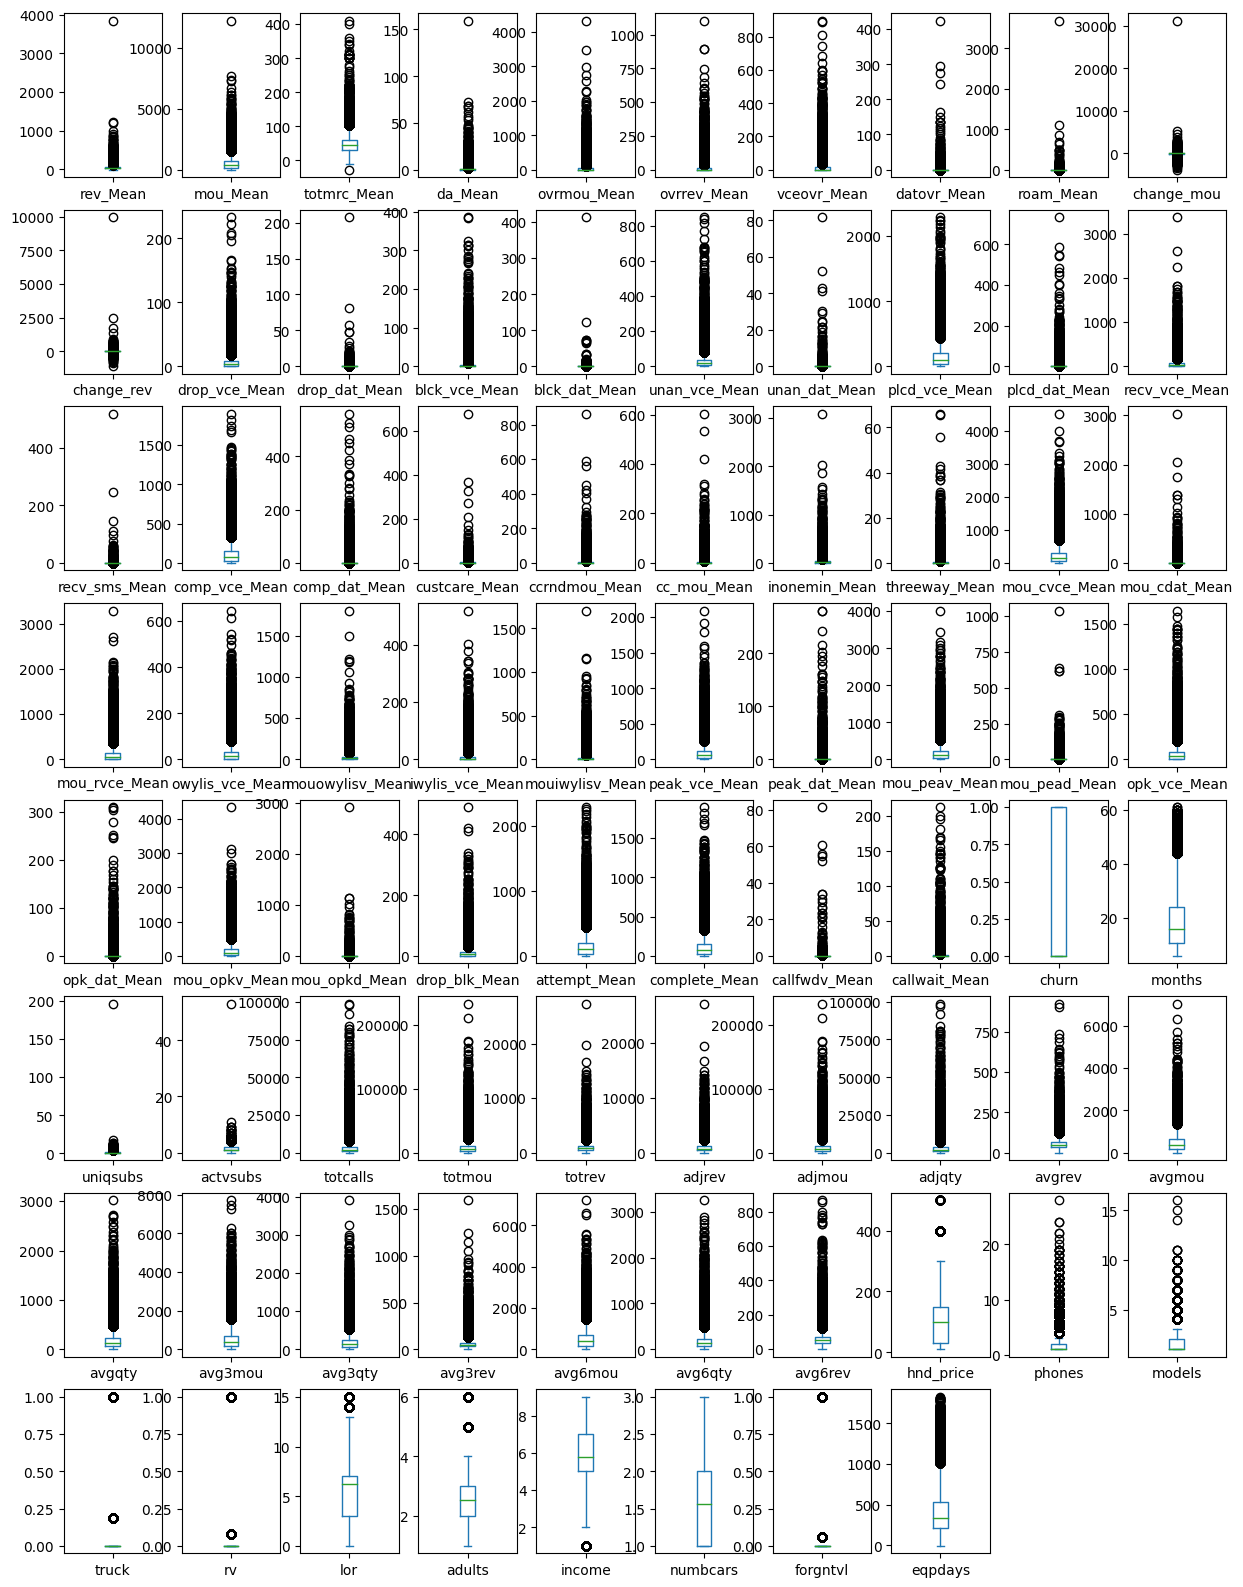

In [34]:
df2[numerical].plot(kind = "box",subplots = True,layout = (8,10),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [36]:
df3 = treat_outliers_all(df2 , numerical)

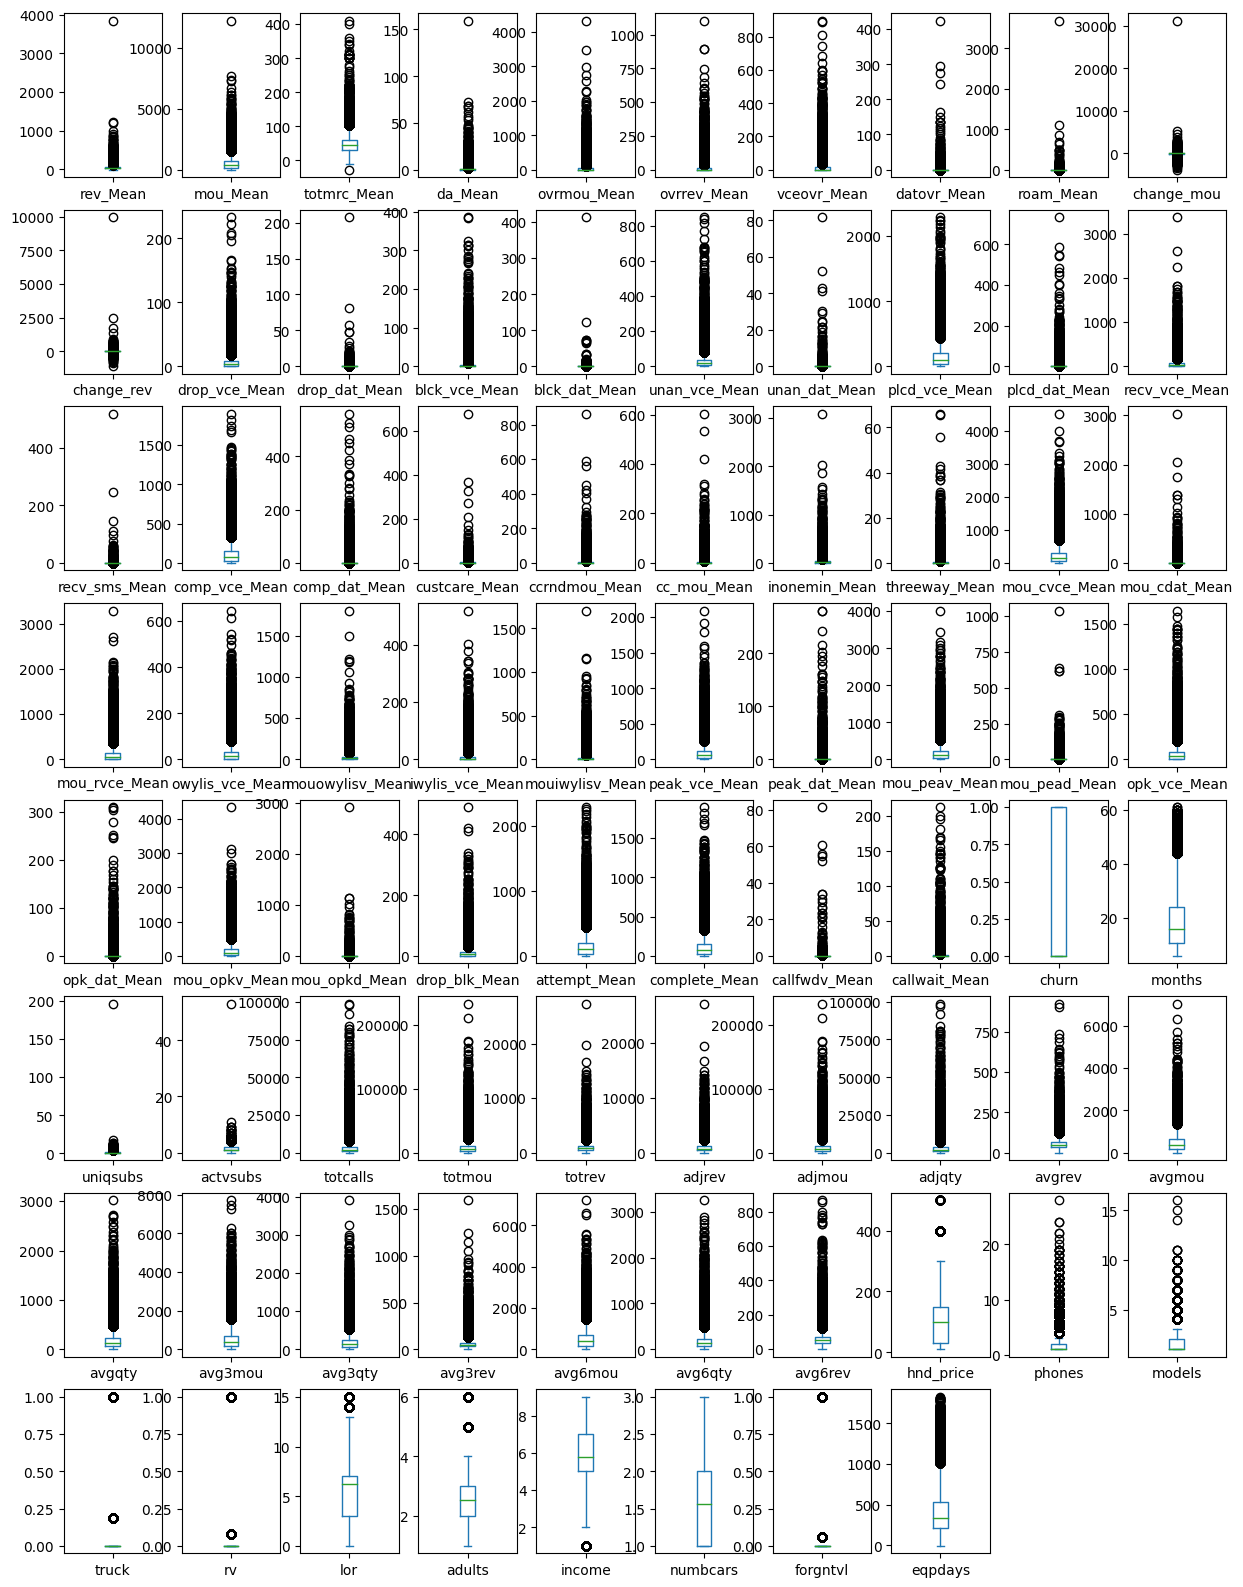

In [37]:
df3[numerical].plot(kind = "box",subplots = True,layout = (8,10),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Feature Engineering

In [38]:
X = df3.drop(['churn'],axis=1)
y = df3.churn

In [39]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 127), (20000, 127), (80000,), (20000,))

In [40]:
y.value_counts()

0    50438
1    49562
Name: churn, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [42]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [43]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.5893
Test set score: 0.5823


In [44]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5780


In [45]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.6221


In [46]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.6221


CNN

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [48]:
churn_model = Sequential()
churn_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dropout(0.2))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(256, activation = "relu"))
churn_model.add(Flatten())
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
# churn_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
churn_model.add(Dense(1, activation = "sigmoid"))
churn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               32768     
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [49]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
churn_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [50]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [51]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='churn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [52]:
history=churn_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


500/500 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5477
Epoch 1: val_accuracy improved from -inf to 0.57856, saving model to churn_model.h5
500/500 [==============================] - 5s 5ms/step - loss: 0.6871 - accuracy: 0.5477 - val_loss: 0.6772 - val_accuracy: 0.5786
Epoch 2/100
495/500 [============================>.] - ETA: 0s - loss: 0.6792 - accuracy: 0.5720
Epoch 2: val_accuracy did not improve from 0.57856
500/500 [==============================] - 2s 5ms/step - loss: 0.6792 - accuracy: 0.5722 - val_loss: 0.6755 - val_accuracy: 0.5767
Epoch 3/100
487/500 [============================>.] - ETA: 0s - loss: 0.6740 - accuracy: 0.5846
Epoch 3: val_accuracy improved from 0.57856 to 0.58513, saving model to churn_model.h5
500/500 [==============================] - 2s 4ms/step - loss: 0.6740 - accuracy: 0.5842 - val_loss: 0.6736 - val_accuracy: 0.5851
Epoch 4/100
490/500 [============================>.] - ETA: 0s - loss: 0.6701 - accuracy: 0.5886
Epoch 4: 

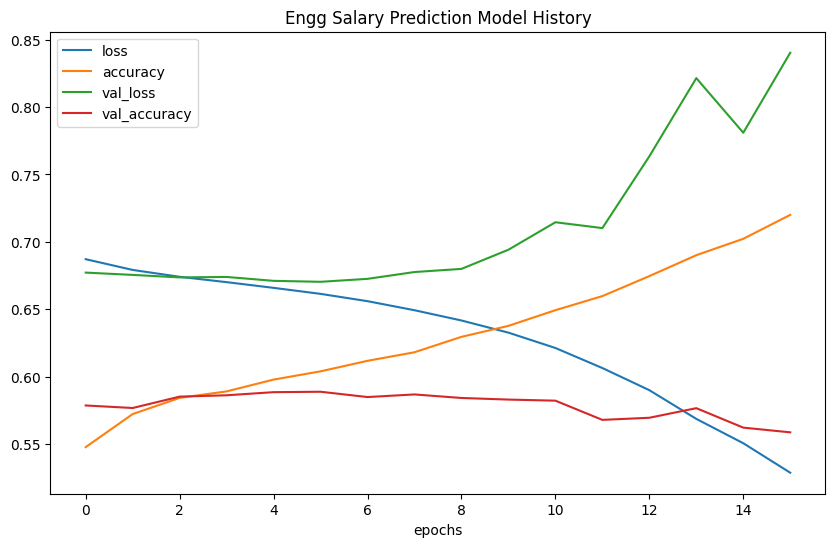

In [53]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [54]:
print("Evaluate churn_model against trained data")
score = churn_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

print("Evaluate churn_model against test data")
score = churn_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

Evaluate churn_model against trained data
score accuracy: 61.23%
Evaluate churn_model against test data
score accuracy: 58.27%
